<a href="https://colab.research.google.com/github/Vnay-XO/Image-Classifier/blob/master/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FaceBook's 'stock price' prediction
In this project, we try to predict FaceBook's stock price using 3 different Regression Modelling Algorithms (Linear, Lasso & Ridge).
####Data 
The data used for the project is the past 5 year data(Aug'2014 - Aug'2019) of the FB stock price - grabbed from 'Yahoo Finance' using 'pandas web data reader’ (an extension of ‘pandas’ library).

*Data Link : https://finance.yahoo.com/quote/FB/history?period1=1406745000&period2=1567276200&interval=1d&filter=history&frequency=1d

## Setting up dependencies

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Data import
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
from pandas import Series, DataFrame

!pip install yfinance --upgrade --no-cache-dir
yf.pdr_override()

#For mounting to drive
from google.colab import drive


#Modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

#Modeling Metrics
from sklearn import metrics

## Importing Data

In [0]:
yf.pdr_override()
df = pdr.get_data_yahoo('FB', start='2014-07-31', end='2019-09-02')
df.to_csv('FB.csv')

In [0]:
df.head()

In [0]:
df.describe()

In [0]:
df.shape()

In [0]:
df["Adj Close"].plot()

##Setting up the data

In [0]:
span=5
num_samples=len(df)-span

# Get indices of access for the data
indices=np.arange(num_samples).astype(np.int)[:,None]+np.arange(span+1).astype(np.int)


data = df['Adj Close'].values[indices] # Creating a 2D matrix of training samples
x = data[:,:-1] # Each row represents the past 5 days
y = data[:,-1] # Each output value represents the 6th day

In [0]:
data_split=int(0.8*num_samples)
x_train = x[:data_split]
y_train = y[:data_split]
x_test = x[data_split:]
y_test = y[data_split:]

##Modelling - Using 3 diff. Regression Models (Linear, Lasso, Ridge)

In [0]:
#Helper fn.s
def model_perfromance(model_pred):
  #Function returns standard performance metrics
  print("Absolute 'Mean Error':", metrics.mean_absolute_error(y_test, model_pred).round(4))  
  print("Sq'd 'Mean Error':", metrics.mean_squared_error(y_test, model_pred).round(4))  
  print("Sq'd 'Root Mean Error':", np.sqrt(metrics.mean_squared_error(y_test, model_pred)).round(4))
   
def model_plot (model_pred):
  plt.scatter(model_pred, y_test, color="gray")
  plt.plot(y_test, y_test, color='red', linewidth=2)

###Linear Regression

In [68]:
# Model fitting - using 'Linear Regression'
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Model Predictions
y_pred_lr = lr_model.predict(x_test)

In [70]:
# Model Performance 
model_perfromance(y_pred_lr)

Absolute 'Mean Error': 2.4238
Sq'd 'Mean Error': 11.0571
Sq'd 'Root Mean Error': 3.3252


In [0]:
# Model Plot
model_plot(y_pred_lr)

###Lasso Regression

In [72]:
# Model fitting - using 'Linear Regression'
lso_model = Lasso()
lso_model.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
# Model Predictions
y_pred_lso = lso_model.predict(x_test)

In [74]:
# Model Performance 
model_perfromance(y_pred_lso)

Absolute 'Mean Error': 2.4242
Sq'd 'Mean Error': 11.0475
Sq'd 'Root Mean Error': 3.3238


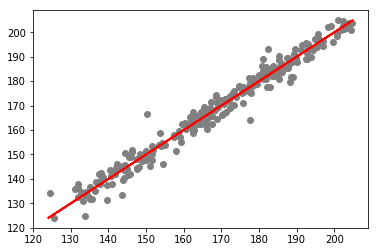

In [75]:
# Model Plot
model_plot(y_pred_lso)

###Ridge Regression

In [76]:
# Model fitting - using 'Linear Regression'
rdg_model = Ridge()
rdg_model.fit(x_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [0]:
# Model Predictions
y_pred_rdg = rdg_model.predict(x_test)

In [78]:
# Model Performance 
model_perfromance(y_pred_rdg)

Absolute 'Mean Error': 2.4238
Sq'd 'Mean Error': 11.0571
Sq'd 'Root Mean Error': 3.3252


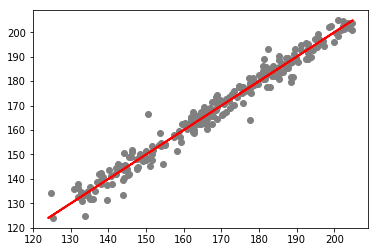

In [79]:
# Model Plot
model_plot(y_pred_rdg)

##Model Comparison

In [0]:
df_comp=pd.DataFrame({"lr":np.absolute(y_test-y_pred_lr), 
              "lso":np.absolute(y_test-y_pred_lso),
              "rdg":np.absolute(y_test-y_pred_rdg)})

In [0]:
df_comp.plot.bar(figsize=(16, 6))
plt.ylim(0,10)
plt.xlim(9,20)

##Inference

We made the Stock Prediction of FaceBook using 3 different Regression Algorithms & concluded that 'Lasso' Regression give us the best performance with the least complexity.